In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)
X_st=X.T
y_st=y.reshape(-1,1)

In [3]:
def calc_std_feat(x):
    res = (x - x.mean(axis = 0)) / x.std(axis = 0)
    return res

In [4]:
X_st[:,1:]= calc_std_feat(X_st[:,1:])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

### Задание 1
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [5]:
def calc_logloss(y, y_pred):
    y_pred[y_pred==1]=1-1e-16
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

###  Задание 2
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [7]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1]).reshape(-1,1)
    n = X.shape[0]
    for i in range(1, iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot(X.T,(y_pred - y)))
    return W,err

In [8]:
iterations=[10,50,100,500,1000,5000,10000]
alpha = [1,0.1,0.01,0.001,0.0001,0.00001]
analys = pd.DataFrame({'alpha':alpha})

In [9]:
for i in iterations:
    data = []
    for j in alpha:
        data.append(eval_model(X_st,y_st,i,alpha=j)[1])
    analys[f'iter_{i}'] = data
analys

,alpha,iter_10,iter_50,iter_100,iter_500,iter_1000,iter_5000,iter_10000
0,1.00000,0.466800,0.352330,0.310266,0.222411,0.179127,0.099540,0.077703
1,0.10000,0.659849,0.500750,0.461771,0.351650,0.310088,0.222412,0.179137
2,0.01000,0.752023,0.703493,0.651970,0.499922,0.461290,0.351583,0.310070
3,0.00100,0.762652,0.757373,0.750868,0.702517,0.651204,0.499840,0.461242
4,0.00010,0.763729,0.763197,0.762532,0.757256,0.750753,0.702420,0.651127
5,0.00001,0.763837,0.763783,0.763717,0.763185,0.762521,0.757244,0.750741


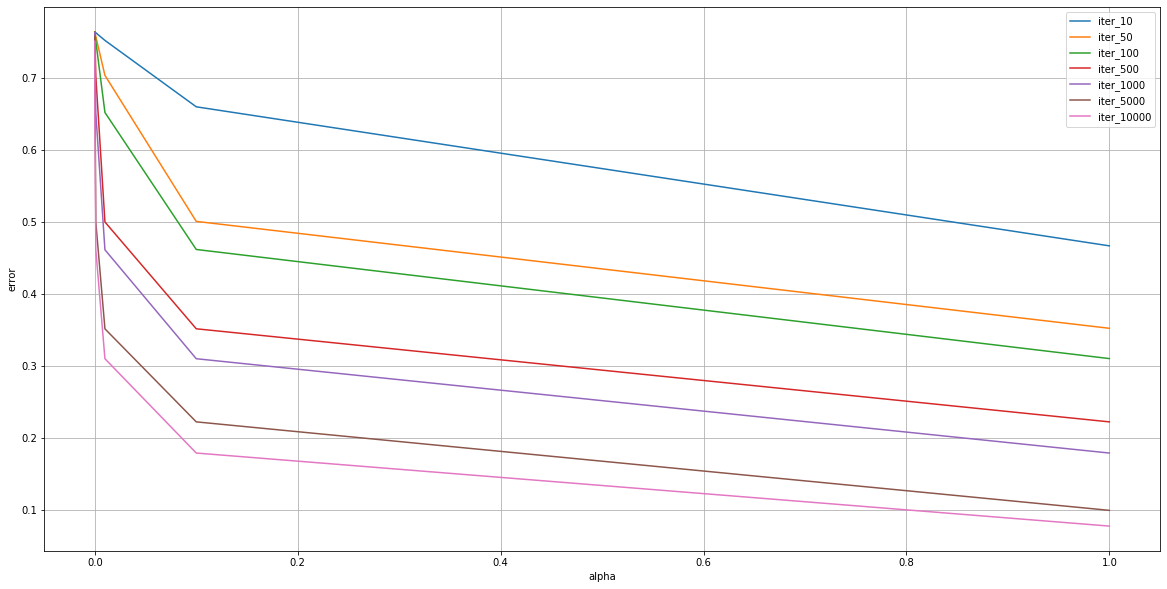

In [10]:
plt.figure(figsize=(20, 10))
plt.grid()
plt.xlabel('alpha')
plt.ylabel('error')
for i in analys.columns[1:]:
    plt.plot(analys['alpha'],analys[i], label =i)
plt.legend()

Вывод: чем больше альфа и чем больше число итераций, тем меньше ошибка

###  Задание 3
Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [11]:
def calc_pred_proba(x,W):
    return sigmoid(x@W)

In [12]:
W,err = eval_model (X_st,y_st,10000,alpha=1)
err, W

(0.07770315308837555,
 array([[  7.51455015],
        [-14.6061865 ],
        [-16.19944717],
        [ 36.33694941]]))

In [13]:
y_pred_proba=calc_pred_proba(X_st,W)
y_pred_proba

array([[3.02054503e-01],
       [5.42305641e-04],
       [1.00000000e+00],
       [1.50927059e-02],
       [9.71155003e-01],
       [3.52815584e-03],
       [1.00000000e+00],
       [7.77810782e-03],
       [6.96960940e-01],
       [1.00000000e+00]])

### Задание 4
Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [14]:
def calc_pred(x,W):
    res = calc_pred_proba(x,W)
    res[res>=0.5]=1
    res[res!=1]=0
    return res

In [15]:
y_pred = calc_pred(X_st,W)
y_pred

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]])

### Задание 5
Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [16]:
def accuracy(y,y_pred):
    return (y_pred==y).sum()/len(y)

In [33]:
def matrix_error(y,y_pred):
    res = pd.DataFrame({'predict':['awesome','bad']})
    t = y_pred[y==1]
    tp = t[t==1]
    fn = t[t!=1]
    res['awesome'] = [len(tp),len(fn)]
    n = y_pred[y!=1]
    fp=n[n==1]
    tn=n[n!=1]                    
    res['bad'] = [len(fp),len(tn)]
    return res

In [18]:
def classification(y, y_pred):
    TP = ((y_pred == 1) & (y == 1)).sum()
    FP = ((y_pred == 1) & (y == 0)).sum()
    FN = ((y_pred == 0) & (y == 1)).sum()
    TN = ((y_pred == 1) & (y == 0)).sum()
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 2 * precision * recall / (precision + recall)
    return precision, recall, F1

In [19]:
accuracy(y_st,y_pred)

1.0

In [34]:
me = matrix_error(y_st,y_pred)
me

,predict,awesome,bad
0,awesome,5,0
1,bad,0,5


In [21]:
classification(y, y_pred)

(0.5, 0.5, 0.5)

### Задание 6
Могла ли модель переобучиться? Почему?

In [22]:
W,err

(array([[  7.51455015],
        [-14.6061865 ],
        [-16.19944717],
        [ 36.33694941]]),
 0.07770315308837555)

Переобучение возможно из-за небольшого количества данных.

### Задание 7 (опциональное)
Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [23]:
def eval_model_l1(X, y, iterations=10000, alpha=1,k=0.001):
    np.random.seed(42)
    W = np.random.randn(X.shape[1]).reshape(-1,1)
    n = X.shape[0]
    for i in range(1, iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W_delta = np.sign(W)*k
        W -= alpha * (1/n * np.dot(X.T,(y_pred - y)))+2*W_delta
    return W,err

In [24]:
W_l1,err_l1 = eval_model_l1(X_st,y_st,iterations=10000, alpha=1)
W_l1,err_l1

(array([[ 4.56526214],
        [-9.53041199],
        [-9.61347299],
        [22.41530955]]),
 0.11892624832338132)

In [25]:
y_pred_l1 = calc_pred(X_st,W_l1)
y_pred_l1

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [35]:
me_l1 = matrix_error(y_st,y_pred_l1)
me_l1

,predict,awesome,bad
0,awesome,5,0
1,bad,0,5


In [27]:
classification(y, y_pred_l1)

(0.5, 0.5, 0.5)

In [28]:
def eval_model_l2(X, y, iterations=10000, alpha=1,k=0.0001):
    np.random.seed(42)
    W = np.random.randn(X.shape[1]).reshape(-1,1)
    n = X.shape[0]
    for i in range(1, iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W_delta = np.sign(W)*k
        W -= alpha * (1/n * np.dot(X.T,(y_pred - y)))+2*k*W
    return W,err

In [29]:
W_l2,err_l2 = eval_model_l2(X_st,y_st,iterations=10000, alpha=1)
W_l2,err_l2

(array([[ 3.96300003],
        [-8.48837573],
        [-8.3021598 ],
        [19.62367265]]),
 0.13284203504575018)

In [30]:
y_pred_l2 = calc_pred(X_st,W_l2)
y_pred_l2

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [36]:
me_l2 = matrix_error(y_st,y_pred_l2)
me_l2

,predict,awesome,bad
0,awesome,5,0
1,bad,0,5


In [32]:
classification(y, y_pred_l2)

(0.5, 0.5, 0.5)

Вывод: получили те же результаты, за исключением небольшого увеличения ошибки